**importing libraries**


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns

**Importing datasets including European and voluntary market carbon credit prices from carboncredit.com (Trading Screener)**

In [186]:
european_carbon_path="/content/ICEEUR_ECFZ2024, 1W.csv"
nature_based_carbon_credit_path="/content/NYMEX_DL_NGOZ2024, 1W (1).csv"
aviation_based_carbon_credit_path="/content/NYMEX_DL_GEO1!, 1W.csv"
tech_based_carbon_credit_path="/content/NYMEX_DL_CGO1!, 1W.csv"
IEA_database_path="/content/IEA CCUS Projects Database 2024 (1).xlsx"

In [187]:
european_carbon=pd.read_csv(european_carbon_path)
nature_based_carbon_credit=pd.read_csv(nature_based_carbon_credit_path)
aviation_based_carbon_credt=pd.read_csv(aviation_based_carbon_credit_path)
tech_based_carbon_credit=pd.read_csv(tech_based_carbon_credit_path)
IEA_database=pd.read_excel(IEA_database_path,sheet_name="CCUS Projects Database")

**Exploring the IEA database for CCUS projects**

In [188]:
 IEA_database

,Project name,ID,Country,Partners,Project type,Announcement,FID,Operation,Suspension/decommissioning,Project Status,...,Ref 5,Ref 6,Ref 7,Link 1,Link 2,Link 3,Link 4,Link 5,Link 6,Link 7
0,3D DMX ArcelorMittal and IFPEN Dunkirk (full-s...,1,France,"ArcelorMittal, ifp, Axens, Uetikon, Grassco, b...",Capture,2019.0,NaN,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
1,3D DMX ArcelorMittal and IFPEN Dunkirk 'REUZE',751,France,"ArcelorMittal, Engie, Infinium",CCU,2022.0,2024.0,2025.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
2,7 Blue Ammonia Facility,1055,Qatar,"QAFCO, thyssenkrupp Uhde/Consolidated Contract...",Full Chain,2022.0,2022.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN
3,8Rivers H2 (8RH2) (WY),3,United States,"8Rivers, Wyoming Energy Authority",Capture,2022.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
4,Abadi CCS/CCUS,227,Indonesia,"Inpex Masela 65%, Shell (trying to find a buye...",Full chain,2018.0,NaN,2027.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Yara Pilbara ammonia,788,Australia,"Yara, JERA",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
840,Yara Sluiskil fertiliser,465,Netherlands,Yara,Capture,2022.0,2023.0,2026.0,NaN,Under construction,...,NaN,NaN,NaN,Link 1,Link 2,Link 3,NaN,NaN,NaN,NaN
841,Yara-BASF Gulf Coast,826,United States,"Yara, BASF",Capture,2023.0,NaN,2028.0,NaN,Planned,...,NaN,NaN,NaN,Link 1,NaN,NaN,NaN,NaN,NaN,NaN
842,ZerCal250,640,United Kingdom,"Origin, Singleton Birch",Capture,2021.0,NaN,NaN,NaN,Planned,...,NaN,NaN,NaN,Link 1,Link 2,NaN,NaN,NaN,NaN,NaN


In [189]:
IEA_database.nunique()

,0
Project name,841
ID,841
Country,66
Partners,684
Project type,7
Announcement,24
FID,23
Operation,40
Suspension/decommissioning,6
Project Status,4


In [190]:
IEA_database["Project type"].unique()

array(['Capture', 'CCU', 'Full Chain', 'Full chain', 'T&S', 'Transport',
       'Storage'], dtype=object)

In [191]:
IEA_database["Fate of carbon"].unique()

array(['Unknown/unspecified', 'Use', 'Dedicated storage', 'EOR', 'Mixed'],
      dtype=object)

In [192]:
IEA_database["Project type"].value_counts(dropna=False)

,count
Project type,
Capture,352
Full chain,144
Storage,134
T&S,88
Transport,63
CCU,55
Full Chain,8


In [193]:
IEA_database.loc[IEA_database["Project type"]=="Full Chain", "Project type"]="Full chain"

In [194]:
IEA_database["Project type"].value_counts(dropna=False)

,count
Project type,
Capture,352
Full chain,152
Storage,134
T&S,88
Transport,63
CCU,55


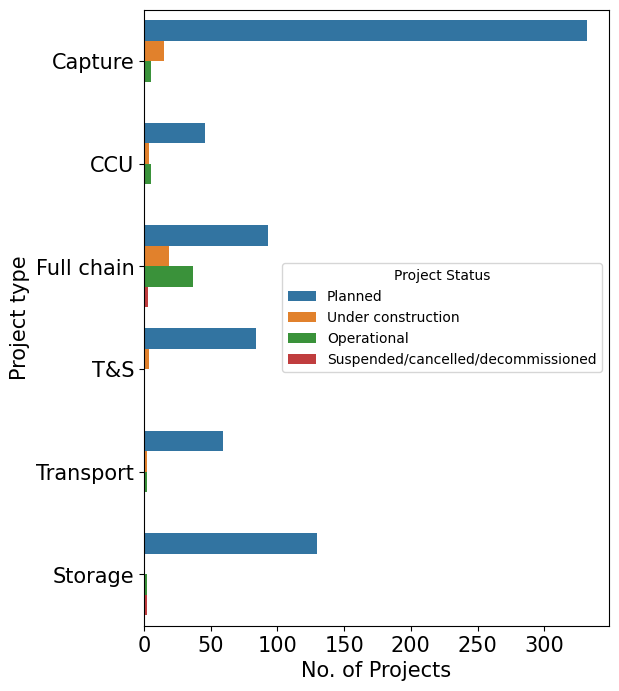

In [195]:
# Total Bumber of Project Types
plt.figure(figsize=(6,8))
sns.countplot(data=IEA_database,y="Project type",hue="Project Status")
plt.xticks(size=15)
plt.ylabel("Project type",size=15)
plt.yticks(size=15)
plt.xlabel("No. of Projects",size=15)
plt.show()

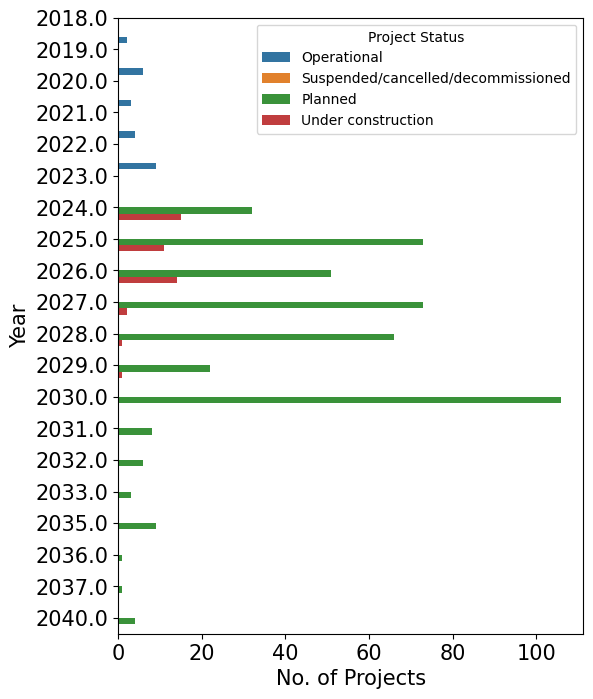

In [196]:
plt.figure(figsize=(6,8))
sns.countplot(data=IEA_database,y="Operation",hue="Project Status")
plt.xticks(size=15)
plt.ylabel("Year",size=15)
plt.yticks(size=15)
plt.xlabel("No. of Projects",size=15)
plt.ylim(top=20)
plt.show()

In [197]:
IEA_database["Country"].value_counts().head(10).reset_index()

,Country,count
0,United States,293
1,United Kingdom,92
2,Canada,74
3,Norway,34
4,Australia,33
5,People's Republic of China,30
6,France,24
7,Denmark,24
8,Netherlands,23
9,Germany,21


<Axes: xlabel='count', ylabel='Country'>

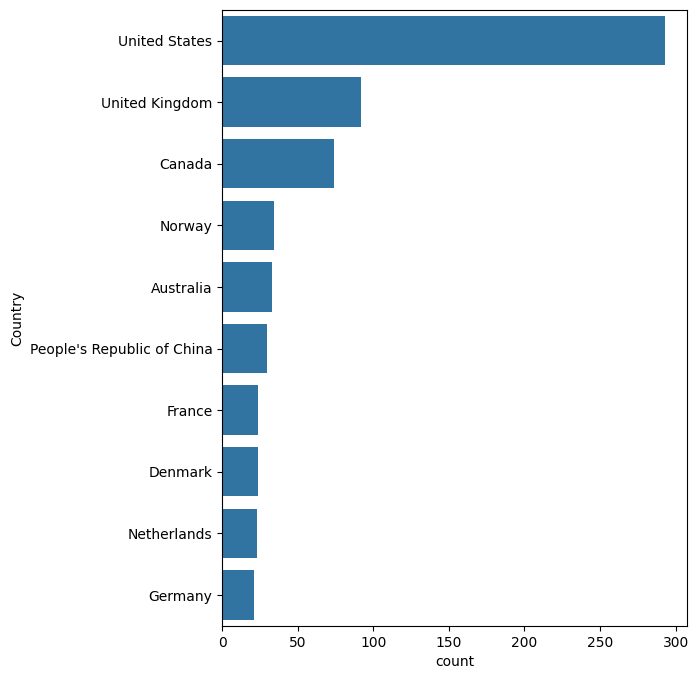

In [198]:
plt.figure(figsize=(6,8))
sns.barplot(data=IEA_database["Country"].value_counts().head(10).reset_index(),y="Country",x="count")

In [199]:
Announced_projects=IEA_database.groupby(by=["Announcement","Project type"])["Project name"].count().reset_index()
Announced_projects=pd.pivot(data=Announced_projects,index="Announcement",columns="Project type",values="Project name")
Announced_projects.fillna(0,inplace=True)
Announced_projects.reset_index(inplace=True)

In [200]:
FID_projects=IEA_database.groupby(by=["FID","Project type"])["Project name"].count().reset_index()
FID_projects=pd.pivot(data=FID_projects,index="FID",columns="Project type",values="Project name")
FID_projects.fillna(0,inplace=True)
FID_projects.reset_index(inplace=True)

In [201]:
Operation_projects=IEA_database.groupby(by=["Operation","Project type"])["Project name"].count().reset_index()
Operation_projects=pd.pivot(data=Operation_projects,index="Operation",columns="Project type",values="Project name")
Operation_projects.fillna(0,inplace=True)
Operation_projects.reset_index(inplace=True)

In [202]:
Announced_projects.shape

(24, 7)

In [203]:
FID_projects.shape

(23, 7)

In [204]:
Operation_projects.shape

(40, 7)

In [205]:
Operation_projects.head(5)

Project type,Operation,CCU,Capture,Full chain,Storage,T&S,Transport
0,1972.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1982.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1986.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1992.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1996.0,0.0,0.0,1.0,0.0,0.0,0.0


In [206]:
IEA_database.groupby(by="FID")["Project name"].count().head(5)

,Project name
FID,
1984.0,1
2002.0,1
2008.0,2
2009.0,1
2010.0,1


In [207]:
IEA_database.groupby(by="Operation")["Project name"].count().head(5)

,Project name
Operation,
1972.0,1
1982.0,1
1986.0,1
1992.0,1
1996.0,1


In [208]:
IEA_database.groupby(by=["Announcement","Country"])["Project name"].count()

Announcement  Country       
1982.0        United States     1
1984.0        United States     1
1991.0        Norway            1
1997.0        United States     1
2002.0        Norway            1
                               ..
2024.0        Taiwan            1
              Thailand          1
              United Kingdom    3
              United States     3
              Unknown           1
Name: Project name, Length: 195, dtype: int64

In [209]:
# creating an yearly database for projects announced, FID and operation
projects_data=Operation_projects.merge(FID_projects,left_on="Operation",right_on="FID",how="left",suffixes=("_operation","_FID"))


In [210]:
projects_data

Project type,Operation,CCU_operation,Capture_operation,Full chain_operation,Storage_operation,T&S_operation,Transport_operation,FID,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID
0,1972.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2003.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2004.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
projects_data.fillna(0)

Project type,Operation,CCU_operation,Capture_operation,Full chain_operation,Storage_operation,T&S_operation,Transport_operation,FID,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID
0,1972.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1982.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1986.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1996.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1997.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2003.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2004.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2005.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Exploring Carbon credit prices**

In [212]:
european_carbon

,time,open,high,low,close,Volume
0,2017-01-30,5.34,5.88,5.34,5.67,0
1,2017-02-06,5.61,5.80,5.61,5.63,0
2,2017-02-13,5.42,5.66,5.42,5.49,0
3,2017-02-20,5.61,5.91,5.57,5.91,0
4,2017-02-27,5.71,6.44,5.71,6.12,0
...,...,...,...,...,...,...
396,2024-09-02,70.03,70.99,65.95,66.49,154013
397,2024-09-09,66.50,67.45,64.60,65.03,140397
398,2024-09-16,64.85,65.42,62.39,63.56,166827
399,2024-09-23,63.70,66.75,63.34,66.46,144337


In [213]:
nature_based_carbon_credit

,time,open,high,low,close,Volume
0,2021-08-02,14.05,14.05,10.42,12.09,0
1,2021-08-09,12.09,13.37,12.09,13.37,0
2,2021-08-16,14.37,14.37,12.84,12.84,0
3,2021-08-23,13.38,13.92,13.03,13.92,0
4,2021-08-30,13.92,14.60,13.92,14.24,0
...,...,...,...,...,...,...
162,2024-09-09,0.26,0.29,0.20,0.27,658
163,2024-09-16,0.27,0.32,0.27,0.28,1598
164,2024-09-23,0.30,0.33,0.29,0.33,204
165,2024-09-30,0.33,0.35,0.30,0.34,1681


In [214]:
aviation_based_carbon_credt

,time,open,high,low,close,Volume
0,2021-03-01,2.12,2.75,2.12,2.74,25
1,2021-03-08,2.73,2.73,2.57,2.63,2
2,2021-03-15,2.63,2.63,2.46,2.46,1
3,2021-03-22,2.46,2.46,2.39,2.39,1
4,2021-03-29,2.32,2.32,2.32,2.32,0
...,...,...,...,...,...,...
183,2024-09-03,0.22,0.23,0.22,0.22,0
184,2024-09-09,0.22,0.23,0.22,0.23,0
185,2024-09-16,0.25,0.25,0.25,0.25,0
186,2024-09-23,0.26,0.35,0.26,0.35,0


In [215]:
tech_based_carbon_credit

,time,open,high,low,close,Volume
0,2022-09-12,2.30,2.31,2.09,2.09,0
1,2022-09-19,2.11,2.11,2.00,2.00,0
2,2022-09-26,2.01,2.03,1.92,1.92,0
3,2022-10-03,2.05,2.11,1.99,2.11,0
4,2022-10-10,1.98,1.99,1.86,1.86,0
...,...,...,...,...,...,...
103,2024-09-03,0.57,0.57,0.57,0.57,0
104,2024-09-09,0.57,0.57,0.57,0.57,0
105,2024-09-16,0.57,0.57,0.57,0.57,0
106,2024-09-23,0.57,0.57,0.57,0.57,0


In [216]:
df=aviation_based_carbon_credt.merge(nature_based_carbon_credit,on="time",how="left",suffixes=("_aviation","_nature"))

In [217]:
df

,time,open_aviation,high_aviation,low_aviation,close_aviation,Volume_aviation,open_nature,high_nature,low_nature,close_nature,Volume_nature
0,2021-03-01,2.12,2.75,2.12,2.74,25,NaN,NaN,NaN,NaN,NaN
1,2021-03-08,2.73,2.73,2.57,2.63,2,NaN,NaN,NaN,NaN,NaN
2,2021-03-15,2.63,2.63,2.46,2.46,1,NaN,NaN,NaN,NaN,NaN
3,2021-03-22,2.46,2.46,2.39,2.39,1,NaN,NaN,NaN,NaN,NaN
4,2021-03-29,2.32,2.32,2.32,2.32,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
183,2024-09-03,0.22,0.23,0.22,0.22,0,0.37,0.37,0.29,0.31,246.0
184,2024-09-09,0.22,0.23,0.22,0.23,0,0.26,0.29,0.20,0.27,658.0
185,2024-09-16,0.25,0.25,0.25,0.25,0,0.27,0.32,0.27,0.28,1598.0
186,2024-09-23,0.26,0.35,0.26,0.35,0,0.30,0.33,0.29,0.33,204.0


In [218]:
df=df.merge(tech_based_carbon_credit,on="time",how="left")

In [219]:
df

,time,open_aviation,high_aviation,low_aviation,close_aviation,Volume_aviation,open_nature,high_nature,low_nature,close_nature,Volume_nature,open,high,low,close,Volume
0,2021-03-01,2.12,2.75,2.12,2.74,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-08,2.73,2.73,2.57,2.63,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-15,2.63,2.63,2.46,2.46,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-22,2.46,2.46,2.39,2.39,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-29,2.32,2.32,2.32,2.32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2024-09-03,0.22,0.23,0.22,0.22,0,0.37,0.37,0.29,0.31,246.0,0.57,0.57,0.57,0.57,0.0
184,2024-09-09,0.22,0.23,0.22,0.23,0,0.26,0.29,0.20,0.27,658.0,0.57,0.57,0.57,0.57,0.0
185,2024-09-16,0.25,0.25,0.25,0.25,0,0.27,0.32,0.27,0.28,1598.0,0.57,0.57,0.57,0.57,0.0
186,2024-09-23,0.26,0.35,0.26,0.35,0,0.30,0.33,0.29,0.33,204.0,0.57,0.57,0.57,0.57,0.0


In [220]:
df=df.rename(columns={"open":"open_tech","high":"high_tech","low":"low_tech","close":"close_tech","Volume":"Volumne_tech"})

In [221]:
df

,time,open_aviation,high_aviation,low_aviation,close_aviation,Volume_aviation,open_nature,high_nature,low_nature,close_nature,Volume_nature,open_tech,high_tech,low_tech,close_tech,Volumne_tech
0,2021-03-01,2.12,2.75,2.12,2.74,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-08,2.73,2.73,2.57,2.63,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-15,2.63,2.63,2.46,2.46,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-22,2.46,2.46,2.39,2.39,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-29,2.32,2.32,2.32,2.32,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2024-09-03,0.22,0.23,0.22,0.22,0,0.37,0.37,0.29,0.31,246.0,0.57,0.57,0.57,0.57,0.0
184,2024-09-09,0.22,0.23,0.22,0.23,0,0.26,0.29,0.20,0.27,658.0,0.57,0.57,0.57,0.57,0.0
185,2024-09-16,0.25,0.25,0.25,0.25,0,0.27,0.32,0.27,0.28,1598.0,0.57,0.57,0.57,0.57,0.0
186,2024-09-23,0.26,0.35,0.26,0.35,0,0.30,0.33,0.29,0.33,204.0,0.57,0.57,0.57,0.57,0.0


In [222]:
df.columns.values.tolist()

['time',
 'open_aviation',
 'high_aviation',
 'low_aviation',
 'close_aviation',
 'Volume_aviation',
 'open_nature',
 'high_nature',
 'low_nature',
 'close_nature',
 'Volume_nature',
 'open_tech',
 'high_tech',
 'low_tech',
 'close_tech',
 'Volumne_tech']

In [223]:
df2=df[["time","close_aviation","Volume_aviation","close_nature","Volume_nature","close_tech","Volumne_tech"]]

In [224]:
dummy=df2[["time","close_aviation","close_nature","close_tech"]]
dummy.set_index("time",inplace=True)

<Axes: xlabel='time'>

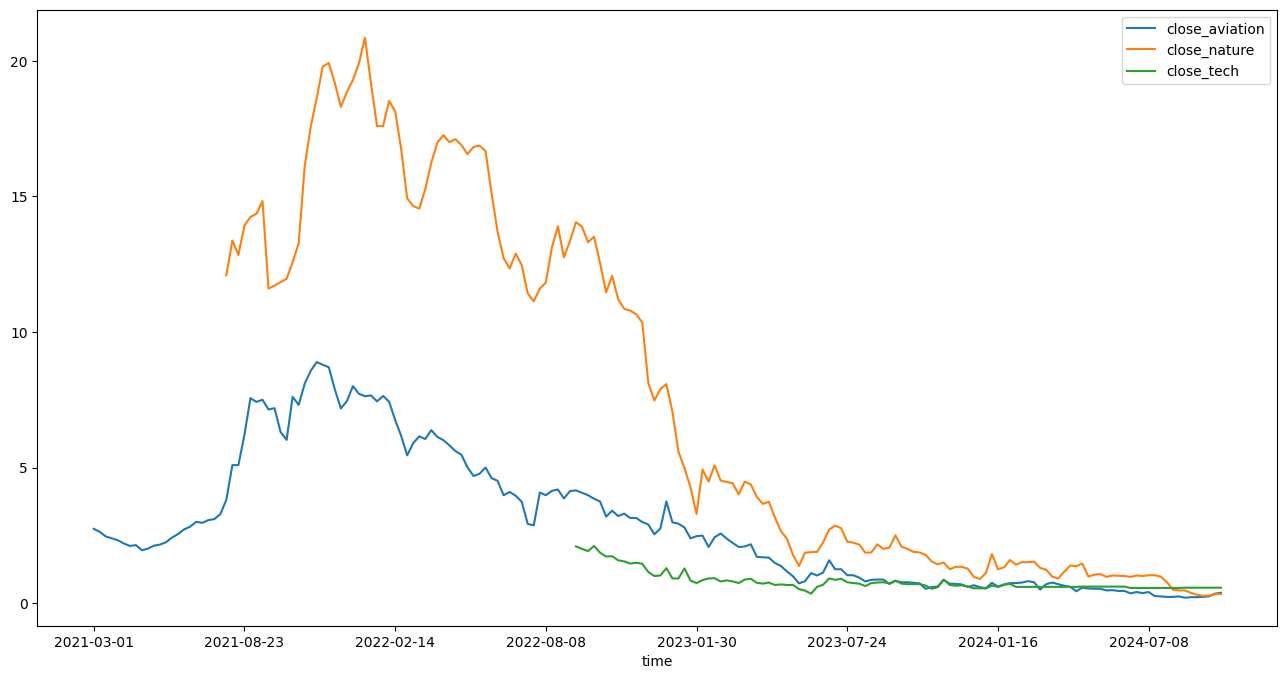

In [225]:
dummy.plot(figsize=(16,8))

In [226]:
dummy2=df2[["time","Volume_aviation","Volume_nature","Volumne_tech"]]
dummy2.set_index("time",inplace=True)

<Axes: xlabel='time'>

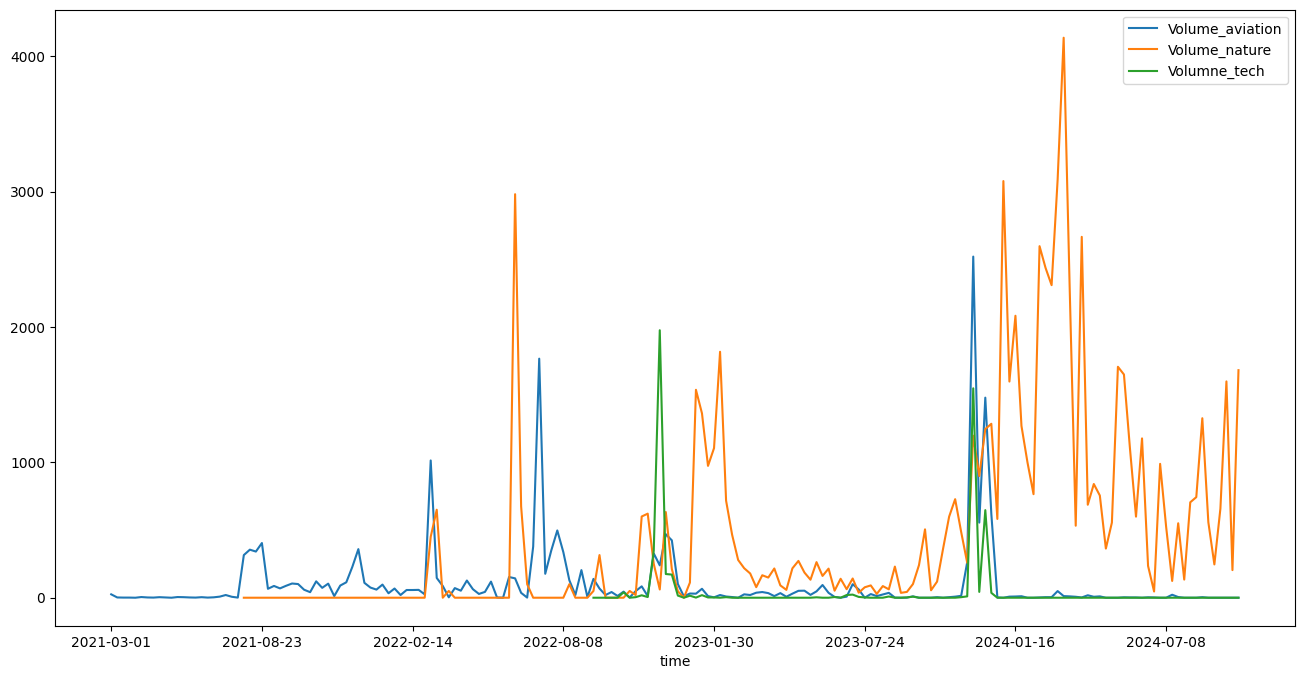

In [227]:
dummy2.plot(figsize=(16,8))

In [228]:
df2.dtypes

,0
time,object
close_aviation,float64
Volume_aviation,int64
close_nature,float64
Volume_nature,float64
close_tech,float64
Volumne_tech,float64


In [229]:
df2["time"]=pd.to_datetime(df2["time"])

<ipython-input-229-a85def39c704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["time"]=pd.to_datetime(df2["time"])


In [230]:
df2["year"]=df2["time"].dt.year

<ipython-input-230-49550d9b31fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["year"]=df2["time"].dt.year


In [231]:
df2

,time,close_aviation,Volume_aviation,close_nature,Volume_nature,close_tech,Volumne_tech,year
0,2021-03-01,2.74,25,NaN,NaN,NaN,NaN,2021
1,2021-03-08,2.63,2,NaN,NaN,NaN,NaN,2021
2,2021-03-15,2.46,1,NaN,NaN,NaN,NaN,2021
3,2021-03-22,2.39,1,NaN,NaN,NaN,NaN,2021
4,2021-03-29,2.32,0,NaN,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...
183,2024-09-03,0.22,0,0.31,246.0,0.57,0.0,2024
184,2024-09-09,0.23,0,0.27,658.0,0.57,0.0,2024
185,2024-09-16,0.25,0,0.28,1598.0,0.57,0.0,2024
186,2024-09-23,0.35,0,0.33,204.0,0.57,0.0,2024


**Merging df2 with projects_data**

In [232]:
df3=df2.merge(projects_data,left_on="year",right_on="Operation",how="left")

In [233]:
df3

,time,close_aviation,Volume_aviation,close_nature,Volume_nature,close_tech,Volumne_tech,year,Operation,CCU_operation,...,Storage_operation,T&S_operation,Transport_operation,FID,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID
0,2021-03-01,2.74,25,NaN,NaN,NaN,NaN,2021,2021.0,0.0,...,0.0,0.0,0.0,2021.0,1.0,2.0,6.0,0.0,0.0,0.0
1,2021-03-08,2.63,2,NaN,NaN,NaN,NaN,2021,2021.0,0.0,...,0.0,0.0,0.0,2021.0,1.0,2.0,6.0,0.0,0.0,0.0
2,2021-03-15,2.46,1,NaN,NaN,NaN,NaN,2021,2021.0,0.0,...,0.0,0.0,0.0,2021.0,1.0,2.0,6.0,0.0,0.0,0.0
3,2021-03-22,2.39,1,NaN,NaN,NaN,NaN,2021,2021.0,0.0,...,0.0,0.0,0.0,2021.0,1.0,2.0,6.0,0.0,0.0,0.0
4,2021-03-29,2.32,0,NaN,NaN,NaN,NaN,2021,2021.0,0.0,...,0.0,0.0,0.0,2021.0,1.0,2.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2024-09-03,0.22,0,0.31,246.0,0.57,0.0,2024,2024.0,5.0,...,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
184,2024-09-09,0.23,0,0.27,658.0,0.57,0.0,2024,2024.0,5.0,...,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
185,2024-09-16,0.25,0,0.28,1598.0,0.57,0.0,2024,2024.0,5.0,...,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
186,2024-09-23,0.35,0,0.33,204.0,0.57,0.0,2024,2024.0,5.0,...,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0


In [234]:
df3.columns

Index(['time', 'close_aviation', 'Volume_aviation', 'close_nature',
       'Volume_nature', 'close_tech', 'Volumne_tech', 'year', 'Operation',
       'CCU_operation', 'Capture_operation', 'Full chain_operation',
       'Storage_operation', 'T&S_operation', 'Transport_operation', 'FID',
       'CCU_FID', 'Capture_FID', 'Full chain_FID', 'Storage_FID', 'T&S_FID',
       'Transport_FID'],
      dtype='object')

In [235]:
df3.drop(["Operation","FID"],inplace=True,axis=1)

In [236]:
df3["month"]=df3["time"].dt.month

In [237]:
df3["day"]=df3["time"].dt.day

In [238]:
df3.isna().sum()

,0
time,0
close_aviation,0
Volume_aviation,0
close_nature,22
Volume_nature,22
close_tech,80
Volumne_tech,80
year,0
CCU_operation,0
Capture_operation,0


In [239]:
df3.columns[3:7]

Index(['close_nature', 'Volume_nature', 'close_tech', 'Volumne_tech'], dtype='object')

In [240]:
df4=df3.drop(df3.columns[3:7],axis=1)

In [241]:
df4

,time,close_aviation,Volume_aviation,year,CCU_operation,Capture_operation,Full chain_operation,Storage_operation,T&S_operation,Transport_operation,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID,month,day
0,2021-03-01,2.74,25,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,1
1,2021-03-08,2.63,2,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,8
2,2021-03-15,2.46,1,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,15
3,2021-03-22,2.39,1,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,22
4,2021-03-29,2.32,0,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2024-09-03,0.22,0,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,3
184,2024-09-09,0.23,0,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,9
185,2024-09-16,0.25,0,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,16
186,2024-09-23,0.35,0,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,23


In [242]:
df4.time

,time
0,2021-03-01
1,2021-03-08
2,2021-03-15
3,2021-03-22
4,2021-03-29
...,...
183,2024-09-03
184,2024-09-09
185,2024-09-16
186,2024-09-23


**Modelling**

In [243]:
X=df4.drop(["time","close_aviation","Volume_aviation"],axis=1)

In [244]:
Y=df4["close_aviation"]

In [245]:
X

,year,CCU_operation,Capture_operation,Full chain_operation,Storage_operation,T&S_operation,Transport_operation,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID,month,day
0,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,1
1,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,8
2,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,15
3,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,22
4,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,3
184,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,9
185,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,16
186,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,9,23


In [246]:
X.columns

Index(['year', 'CCU_operation', 'Capture_operation', 'Full chain_operation',
       'Storage_operation', 'T&S_operation', 'Transport_operation', 'CCU_FID',
       'Capture_FID', 'Full chain_FID', 'Storage_FID', 'T&S_FID',
       'Transport_FID', 'month', 'day'],
      dtype='object')

In [247]:
X_val=X.loc[(X["year"]==2024) & (X["month"]>6)]

In [248]:
X_train=X.iloc[:X.shape[0]-X_val.shape[0],]

In [249]:
X_train.shape

(174, 15)

In [250]:
X_val.shape

(14, 15)

In [251]:
X_train

,year,CCU_operation,Capture_operation,Full chain_operation,Storage_operation,T&S_operation,Transport_operation,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID,month,day
0,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,1
1,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,8
2,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,15
3,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,22
4,2021,0.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0,3,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,5,28
170,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,6,3
171,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,6,10
172,2024,5.0,22.0,12.0,4.0,3.0,1.0,10.0,74.0,14.0,4.0,12.0,5.0,6,17


<Axes: >

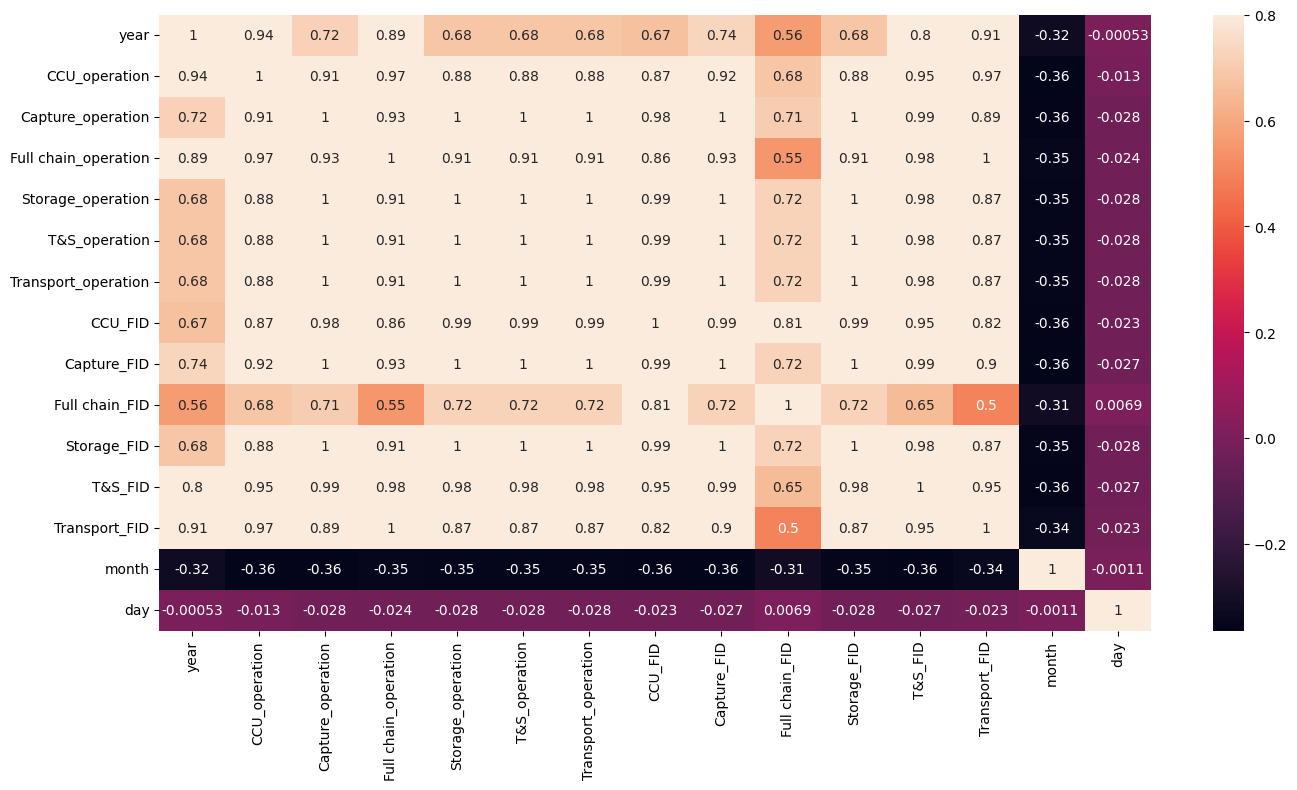

In [252]:
plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(),annot=True,vmax=0.8)

In [253]:
y_train=Y.iloc[:X_train.shape[0],]

In [254]:
y_val=Y.iloc[X_train.shape[0]:,]

In [255]:
y_train

,close_aviation
0,2.74
1,2.63
2,2.46
3,2.39
4,2.32
...,...
169,0.48
170,0.45
171,0.45
172,0.36


In [256]:
y_val

,close_aviation
174,0.37
175,0.41
176,0.26
177,0.25
178,0.23
179,0.23
180,0.25
181,0.20
182,0.22
183,0.22


In [257]:
import xgboost as xgb

In [258]:
# xgb Regressor base_model
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

In [259]:
xgb_base=xgb.XGBRegressor(random_state=1)

In [260]:
scores = cross_validate(xgb_base, X_train, y_train, cv=5,scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_percentage_error','neg_root_mean_squared_error'))

In [261]:
scores

{'fit_time': array([0.44884729, 0.40263414, 1.23865104, 0.04624486, 0.06658268]),
 'score_time': array([0.02959919, 0.02573323, 0.01321888, 0.01000285, 0.01016903]),
 'test_r2': array([  -4.99852303,   -4.60226192,  -23.51856295,   -0.61833204,
        -102.25648619]),
 'test_neg_mean_squared_error': array([-25.51937892, -11.25885619,  -9.6131501 ,  -0.41572057,
         -1.60687101]),
 'test_neg_mean_absolute_percentage_error': array([-1.7098716 , -0.47754224, -0.7491835 , -0.32964402, -1.72868291]),
 'test_neg_root_mean_squared_error': array([-5.0516709 , -3.35542191, -3.10050804, -0.64476396, -1.26762416])}

In [262]:
xgb_base.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [263]:
y_base_train_predict=xgb_base.predict(X_train)

### Performance Metrics - Train data

In [264]:
print("R2_Score:",r2_score(y_train,y_base_train_predict))
print("MAPE:",mean_absolute_percentage_error(y_train,y_base_train_predict))
print("MSE:",mean_squared_error(y_train,y_base_train_predict))

R2_Score: 0.999996307402287
MAPE: 0.0015696248391841774
MSE: 2.1494794588320733e-05


Performance Metrics - Val data

In [265]:
y_base_val_predict=xgb_base.predict(X_val)

In [266]:
print("R2_Score:",r2_score(y_val,y_base_val_predict))
print("MAPE:",mean_absolute_percentage_error(y_val,y_base_val_predict))
print("MSE:",mean_squared_error(y_val,y_base_val_predict))

R2_Score: -7.008684130780834
MAPE: 0.7105024199059328
MSE: 0.036468115238376994


In [267]:
Pred_Aviation=pd.DataFrame(columns=["Actual","Train_pred","Val_pred"])

In [268]:
Pred_Aviation["Actual"]=Y
Pred_Aviation.loc[0:173,"Train_pred"]=y_base_train_predict
Pred_Aviation.loc[174:,"Val_pred"]=y_base_val_predict

In [269]:
Pred_Aviation["time"]=df3["time"]

In [270]:
Pred_Aviation

,Actual,Train_pred,Val_pred,time
0,2.74,2.739852,NaN,2021-03-01
1,2.63,2.624804,NaN,2021-03-08
2,2.46,2.459786,NaN,2021-03-15
3,2.39,2.390885,NaN,2021-03-22
4,2.32,2.319423,NaN,2021-03-29
...,...,...,...,...
183,0.22,NaN,0.489342,2024-09-03
184,0.23,NaN,0.463764,2024-09-09
185,0.25,NaN,0.433865,2024-09-16
186,0.35,NaN,0.332653,2024-09-23


In [271]:
Pred_Aviation.fillna(0,inplace=True)

<ipython-input-271-ba68cb736fb6>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Pred_Aviation.fillna(0,inplace=True)


In [272]:
Pred_Aviation.head(175)

,Actual,Train_pred,Val_pred,time
0,2.74,2.739852,0.000000,2021-03-01
1,2.63,2.624804,0.000000,2021-03-08
2,2.46,2.459786,0.000000,2021-03-15
3,2.39,2.390885,0.000000,2021-03-22
4,2.32,2.319423,0.000000,2021-03-29
...,...,...,...,...
170,0.45,0.451144,0.000000,2024-06-03
171,0.45,0.451057,0.000000,2024-06-10
172,0.36,0.358369,0.000000,2024-06-17
173,0.41,0.410420,0.000000,2024-06-24


In [273]:
Pred_Aviation.set_index("time",inplace=True)

In [274]:
Pred_Aviation

,Actual,Train_pred,Val_pred
time,,,
2021-03-01,2.74,2.739852,0.000000
2021-03-08,2.63,2.624804,0.000000
2021-03-15,2.46,2.459786,0.000000
2021-03-22,2.39,2.390885,0.000000
2021-03-29,2.32,2.319423,0.000000
...,...,...,...
2024-09-03,0.22,0.000000,0.489342
2024-09-09,0.23,0.000000,0.463764
2024-09-16,0.25,0.000000,0.433865


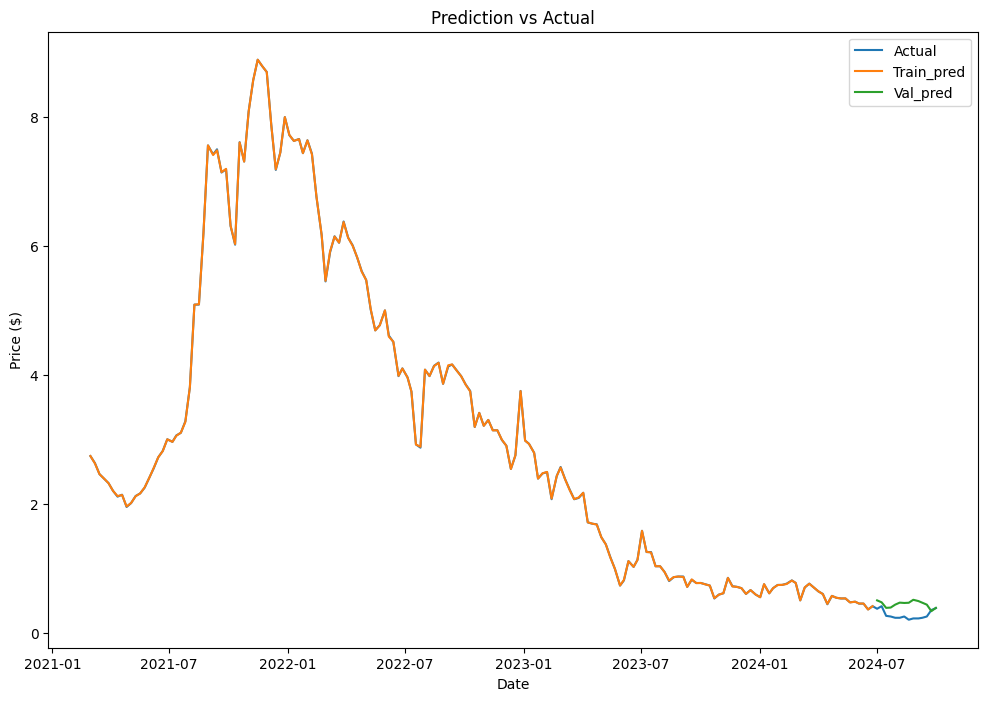

In [275]:
#plotting the results
plt.figure(figsize=(12,8))
plt.title('Prediction vs Actual')
plt.plot(Pred_Aviation['Actual'])
plt.plot(Pred_Aviation.loc[Pred_Aviation['Train_pred']>0]['Train_pred'])
plt.plot(Pred_Aviation.loc[Pred_Aviation['Val_pred']>0]['Val_pred'])
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(['Actual','Train_pred',"Val_pred"],loc='upper right')

## Prediction for Test Dataset

In [276]:
X_test=pd.DataFrame()

In [277]:
X_test["time"]=pd.date_range(start="10/01/2024",end="12/01/2030",freq="W")

In [278]:
X_test

,time
0,2024-10-06
1,2024-10-13
2,2024-10-20
3,2024-10-27
4,2024-11-03
...,...
317,2030-11-03
318,2030-11-10
319,2030-11-17
320,2030-11-24


In [279]:
X_test_2=X_test.copy()

In [280]:
X_test["month"]=X_test.time.dt.month
X_test["day"]=X_test.time.dt.day
X_test["year"]=X_test.time.dt.year

In [281]:
X_test

,time,month,day,year
0,2024-10-06,10,6,2024
1,2024-10-13,10,13,2024
2,2024-10-20,10,20,2024
3,2024-10-27,10,27,2024
4,2024-11-03,11,3,2024
...,...,...,...,...
317,2030-11-03,11,3,2030
318,2030-11-10,11,10,2030
319,2030-11-17,11,17,2030
320,2030-11-24,11,24,2030


In [282]:
X_test=X_test.merge(projects_data,left_on="year",right_on="Operation",how="left")

In [283]:
X_test

,time,month,day,year,Operation,CCU_operation,Capture_operation,Full chain_operation,Storage_operation,T&S_operation,Transport_operation,FID,CCU_FID,Capture_FID,Full chain_FID,Storage_FID,T&S_FID,Transport_FID
0,2024-10-06,10,6,2024,2024.0,5.0,22.0,12.0,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
1,2024-10-13,10,13,2024,2024.0,5.0,22.0,12.0,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
2,2024-10-20,10,20,2024,2024.0,5.0,22.0,12.0,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
3,2024-10-27,10,27,2024,2024.0,5.0,22.0,12.0,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
4,2024-11-03,11,3,2024,2024.0,5.0,22.0,12.0,4.0,3.0,1.0,2024.0,10.0,74.0,14.0,4.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2030-11-03,11,3,2030,2030.0,3.0,51.0,13.0,12.0,21.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,2030-11-10,11,10,2030,2030.0,3.0,51.0,13.0,12.0,21.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2030-11-17,11,17,2030,2030.0,3.0,51.0,13.0,12.0,21.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,2030-11-24,11,24,2030,2030.0,3.0,51.0,13.0,12.0,21.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
X_test.fillna(0,inplace=True)

In [285]:
X_test.columns

Index(['time', 'month', 'day', 'year', 'Operation', 'CCU_operation',
       'Capture_operation', 'Full chain_operation', 'Storage_operation',
       'T&S_operation', 'Transport_operation', 'FID', 'CCU_FID', 'Capture_FID',
       'Full chain_FID', 'Storage_FID', 'T&S_FID', 'Transport_FID'],
      dtype='object')

In [286]:
X_test=X_test.loc[:,['year', 'CCU_operation', 'Capture_operation', 'Full chain_operation', 'Storage_operation', 'T&S_operation', 'Transport_operation', 'CCU_FID', 'Capture_FID', 'Full chain_FID', 'Storage_FID', 'T&S_FID', 'Transport_FID', 'month', 'day']]

In [287]:
y_test_pred=xgb_base.predict(X_test)

In [288]:
y_test_pred=pd.DataFrame(y_test_pred,columns=["Carbon_Offset_Price"])
y_test_pred.index=X_test_2.time

<Axes: xlabel='time'>

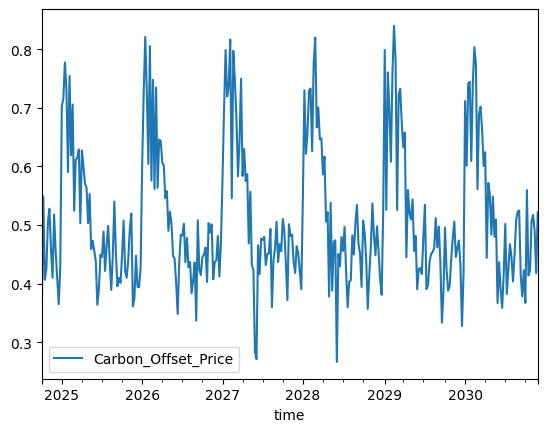

In [289]:
y_test_pred.plot()

In [290]:
y_test_pred.to_csv("/content/Model_Output.csv",index=True)

## Prediction European Carbon Credit Prices

<Axes: xlabel='time'>

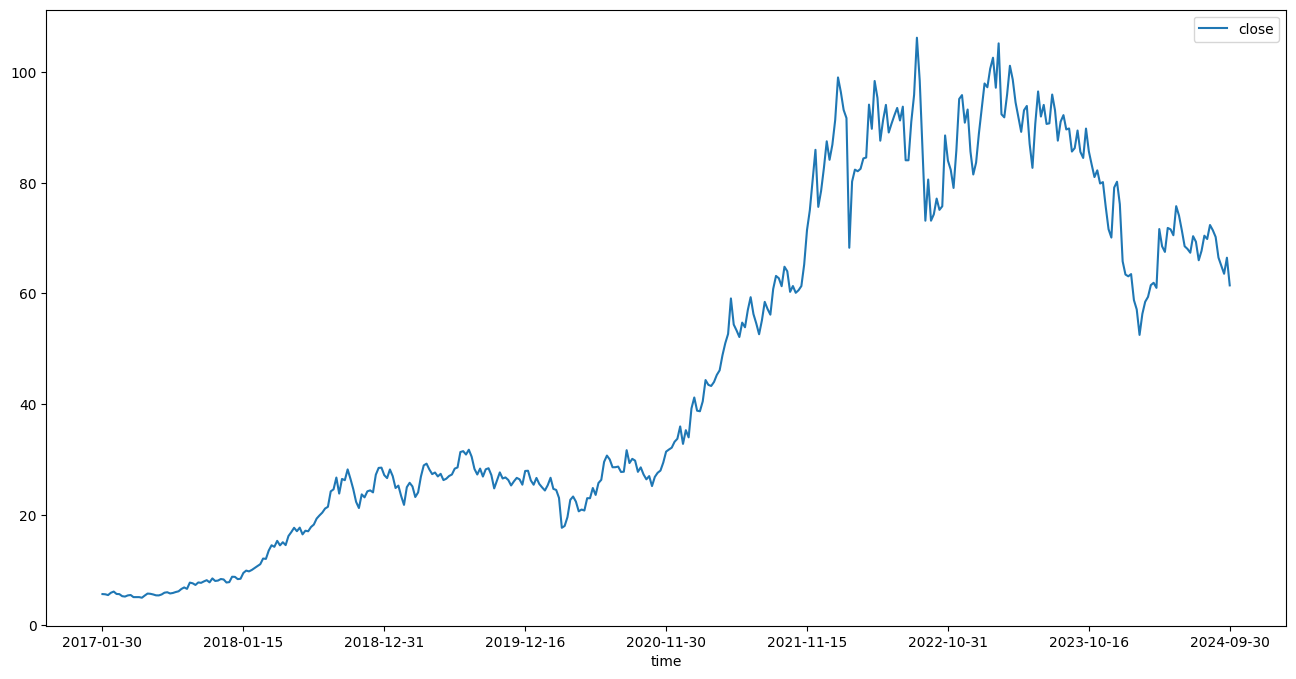

In [291]:
european_carbon.plot(x="time",y="close",figsize=(16,8))

In [292]:
european_carbon["time"]=pd.to_datetime(european_carbon["time"])
european_carbon["month"]=european_carbon.time.dt.month
european_carbon["day"]=european_carbon.time.dt.day
european_carbon["year"]=european_carbon.time.dt.year

In [293]:
european_carbon_X=european_carbon.merge(projects_data,left_on="year",right_on="Operation",how="left")

In [294]:
european_carbon_X=european_carbon_X.drop(european_carbon_X.columns[:4],axis=1)

In [295]:
X_eu=european_carbon_X.drop(["Volume","close"],axis=1)

In [296]:
Y_eu=european_carbon_X["close"]

In [297]:
X_eu_val=X_eu.loc[(X_eu["year"]==2024) & (X_eu["month"]>6)]

In [298]:
X_eu_train=X_eu.iloc[:X_eu.shape[0]-X_eu_val.shape[0],]

In [299]:
y_eu_train=Y_eu.iloc[:X_eu_train.shape[0],]

In [300]:
y_eu_val=Y_eu.iloc[X_eu_train.shape[0]:,]

In [301]:
xgb_eu=xgb.XGBRegressor(random_state=2)

In [302]:
xgb_eu.fit(X_eu_train,y_eu_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [303]:
y_eu_train_predict=xgb_eu.predict(X_eu_train)

In [304]:
print("R2_Score:",r2_score(y_eu_train,y_eu_train_predict))
print("MAPE:",mean_absolute_percentage_error(y_eu_train,y_eu_train_predict))
print("MSE:",mean_squared_error(y_eu_train,y_eu_train_predict))

R2_Score: 0.9999846458925506
MAPE: 0.002569959446958021
MSE: 0.01479789487683952


In [305]:
y_eu_val_predict=xgb_eu.predict(X_eu_val)

In [306]:
print("R2_Score:",r2_score(y_eu_val,y_eu_val_predict))
print("MAPE:",mean_absolute_percentage_error(y_eu_val,y_eu_val_predict))
print("MSE:",mean_squared_error(y_eu_val,y_eu_val_predict))

R2_Score: -1.067563886843756
MAPE: 0.052169518516562284
MSE: 19.546052765728366


In [307]:
Pred_European=pd.DataFrame(columns=["Actual","Train_pred","Val_pred"])
Pred_European["Actual"]=Y_eu
Pred_European.loc[0:386,"Train_pred"]=y_eu_train_predict
Pred_European.loc[387:,"Val_pred"]=y_eu_val_predict

In [308]:
Pred_European["time"]=european_carbon["time"]

In [309]:
Pred_European.fillna(0,inplace=True)

<ipython-input-309-70111e87a994>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Pred_European.fillna(0,inplace=True)


In [310]:
Pred_European.set_index("time",inplace=True)

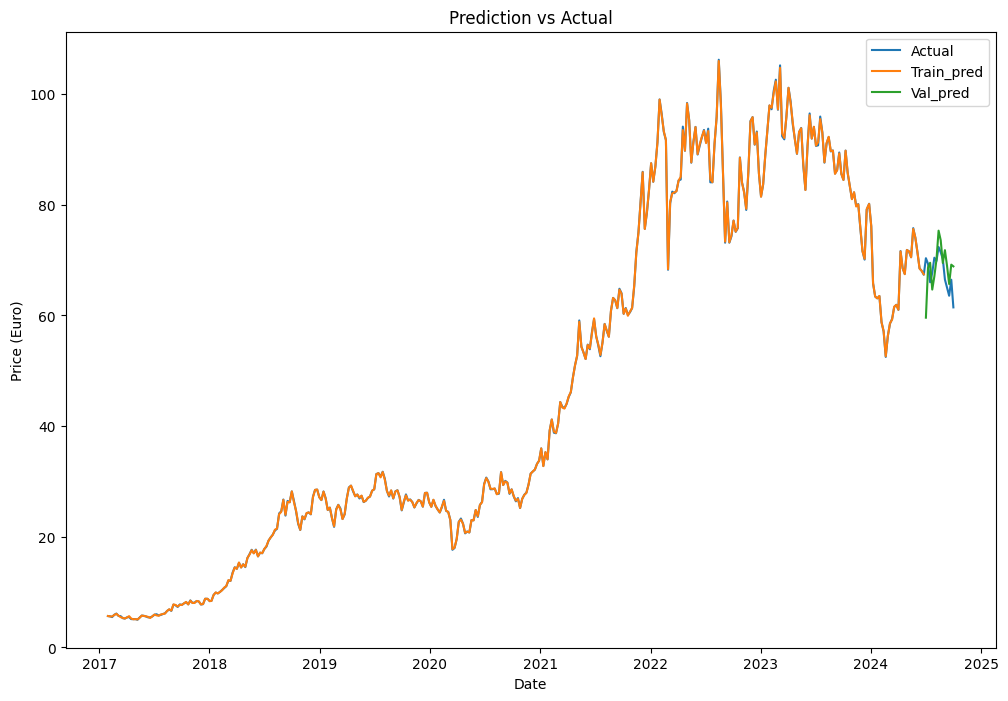

In [311]:
#plotting the results
plt.figure(figsize=(12,8))
plt.title('Prediction vs Actual')
plt.plot(Pred_European['Actual'])
plt.plot(Pred_European.loc[Pred_European['Train_pred']>0]['Train_pred'])
plt.plot(Pred_European.loc[Pred_European['Val_pred']>0]['Val_pred'])
plt.xlabel('Date')
plt.ylabel('Price (Euro)')
plt.legend(['Actual','Train_pred',"Val_pred"],loc='upper right')